In [1]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import scipy.io
import time
import glob,os
import cv2
from scipy import optimize
from pylab import *

import imutils
import cv2
import csv

import struct
import bz2

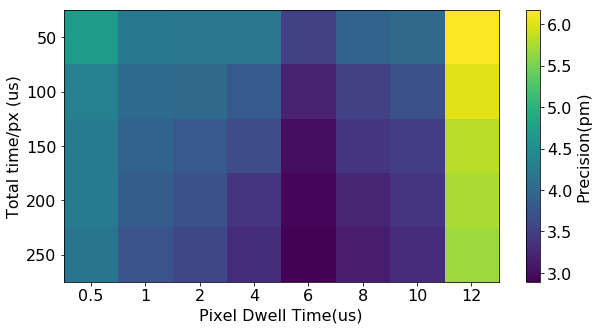

In [114]:
fig, ax = plt.subplots(figsize=(10,5))
plt.imshow(prec[:,:,0]*21.8) # pixel size is about 21.8 pm from 14.5MX scan
plt.xlabel('Pixel Dwell Time(us)',fontsize=16)
plt.ylabel('Total time/px (us)',fontsize=16)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [' ','0.5','1','2','4','6','8','10','12']
ax.set_xticklabels(labels,fontsize=16)
labels_y = [' ','50','100','150','200','250']
ax.set_yticklabels(labels_y,fontsize=16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('Precision(pm)',fontsize=16)
plt.show()

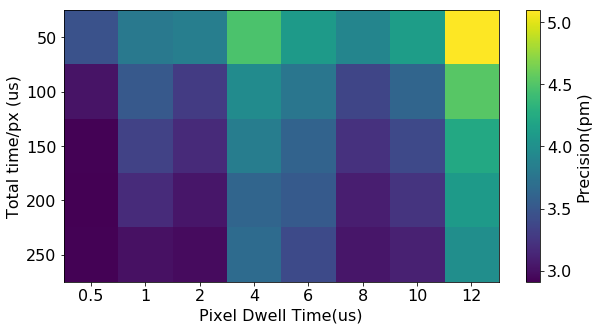

In [113]:
fig, ax = plt.subplots(figsize=(10,5))
plt.imshow(prec[:,:,1]*21.8)
plt.xlabel('Pixel Dwell Time(us)',fontsize=16)
plt.ylabel('Total time/px (us)',fontsize=16)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [' ','0.5','1','2','4','6','8','10','12']
ax.set_xticklabels(labels,fontsize=16)
labels_y = [' ','50','100','150','200','250']
ax.set_yticklabels(labels_y,fontsize=16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('Precision(pm)',fontsize=16)
plt.show()

In [10]:
TotalDose = [50,100,150,200,250] # all the total dose that will be used
FrameDose = [0.5,1,2,4,6,8,10,12] # all the frame dose that will be used
prec = np.zeros((len(TotalDose),len(FrameDose),2))
prec_complete = np.zeros((len(TotalDose),len(FrameDose),2,4))
prec_std = np.zeros((len(TotalDose),len(FrameDose),2))
for ibatch in range(1,5):
    path = '/srv/home/chenyu/NRR/STO_NRR/DoseTest/Batch' + str(ibatch+1) + '/'    
    for i1 in range(len(TotalDose)):
        for i2 in range(len(FrameDose)):
            path2 = path + str(TotalDose[i1]) + '/' + str(FrameDose[i2]) + '/HAADF_NRR/stage3/'
            path_img = path2 + 'average.q2bz'
            path_nSamples = path2 + 'numSamples.q2bz'
            img = LoadImage(path_img)
            nSamples = LoadNumSamples(path_nSamples)
            xprec, yprec = PrecisionFromFitting(img, nSamples)
            prec_complete[i1,i2,0,ibatch-1] = xprec
            prec_complete[i1,i2,1,ibatch-1] = yprec
            prec[i1,i2,0] = prec[i1,i2,0] + xprec
            prec[i1,i2,1] = prec[i1,i2,1] + yprec
#             print(TotalDose[i1], FrameDose[i2], xprec, yprec)
prec = prec / 5

In [11]:
prec_std = np.zeros((len(TotalDose),len(FrameDose),2))
for i1 in range(len(TotalDose)):
    for i2 in range(len(FrameDose)):
        prec_std[i1,i2,0] = np.std(prec_complete[i1,i2,0,:])
        prec_std[i1,i2,1] = np.std(prec_complete[i1,i2,1,:])

Text(0, 0.5, 'Precision Along Slow Scan (pm)')

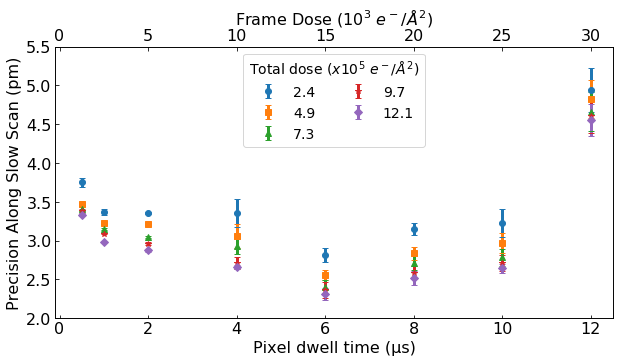

In [17]:
# Convert colormap into plots
px_dwelltime = [0.5,1,2,4,6,8,10,12]
px_dwelltime = np.asarray(px_dwelltime)
fig, ax1 = plt.subplots(figsize=(10,5))

# Axes2: top x axis, in unit of frame dose, the actual axis for the plot
ax2 = ax1.twiny()
TotalDose = [50,100,150,200,250] # all the total dose that will be used

# separate five plots for five different marker types

ax1.errorbar(np.asarray(px_dwelltime),prec[0,:,0]*21.8,yerr=prec_std[0,:,0]*21.8/sqrt(5),fmt='o',
             label='{:.1f}'.format(TotalDose[0]*0.0485),capsize=3, elinewidth=3)
ax1.errorbar(np.asarray(px_dwelltime),prec[1,:,0]*21.8,yerr=prec_std[1,:,0]*21.8/sqrt(5),fmt='s',
             label='{:.1f}'.format(TotalDose[1]*0.0485),capsize=3, elinewidth=3)
ax1.errorbar(np.asarray(px_dwelltime),prec[2,:,0]*21.8,yerr=prec_std[2,:,0]*21.8/sqrt(5),fmt='^',
             label='{:.1f}'.format(TotalDose[2]*0.0485),capsize=3, elinewidth=3)
ax1.errorbar(np.asarray(px_dwelltime),prec[3,:,0]*21.8,yerr=prec_std[3,:,0]*21.8/sqrt(5),fmt='*',
             label='{:.1f}'.format(TotalDose[3]*0.0485),capsize=3, elinewidth=3)
ax1.errorbar(np.asarray(px_dwelltime),prec[4,:,0]*21.8,yerr=prec_std[4,:,0]*21.8/sqrt(5),fmt='D',
             label='{:.1f}'.format(TotalDose[4]*0.0485),capsize=3, elinewidth=3)

legend = ax1.legend(fontsize=14,loc='upper center',ncol=2, title="Total dose ($x10^5$ $e^-$/$\AA^2$)")
legend.get_title().set_fontsize('14')
ax2.tick_params(labelsize=16,direction='in')
ax2.set_xlabel('Frame Dose ($10^3$ $e^-$/$\AA^2$)',fontsize=16)
ax2.set_ylim([2.0,5.5])

# Axes1: bottom x axis, for display only, in unit of pixel dwell time
ax1.tick_params(direction='in')
labels = [item.get_text() for item in ax2.get_xticklabels()]
labels = ['','0','5','10','15','20','25','30']
ax2.set_xticklabels(labels,fontsize=16)
ax2.set_xlim([-0.25,31.25])
ax1.tick_params(labelsize=16)
plt.xticks(fontsize=16)
ax1.set_xlim([-0.1,12.5]) # set x limits so that zeros are aligned and 10 on bottom axis is aligned with last group of data
ax1.set_xlabel('Pixel dwell time (\u03BCs)',fontsize=16)
ax1.set_ylabel('Precision Along Slow Scan (pm)',fontsize=16) # y label belongs to axis 1 as it was initialized at beginning

Text(0, 0.5, 'Precision Along Fast Scan (pm)')

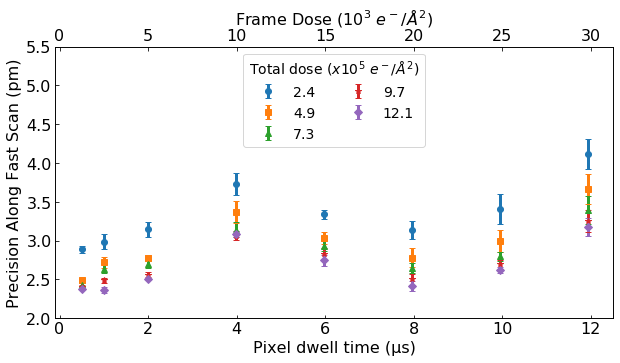

In [23]:
# Convert colormap into plots
px_dwelltime = [0.5,1,2,4,6,8,10,12]
px_dwelltime = np.asarray(px_dwelltime)
fig, ax1 = plt.subplots(figsize=(10,5))

# Axes2: top x axis, in unit of frame dose, the actual axis for the plot
ax2 = ax1.twiny()
TotalDose = [50,100,150,200,250] # all the total dose that will be used

ax2.errorbar(np.asarray(px_dwelltime)*2.485,prec[0,:,1]*21.8,yerr=prec_std[0,:,1]*21.8/sqrt(5),fmt='o',
             label='{:.1f}'.format(TotalDose[0]*0.0485),capsize=3, elinewidth=3)
ax2.errorbar(np.asarray(px_dwelltime)*2.485,prec[1,:,1]*21.8,yerr=prec_std[1,:,1]*21.8/sqrt(5),fmt='s',
             label='{:.1f}'.format(TotalDose[1]*0.0485),capsize=3, elinewidth=3)
ax2.errorbar(np.asarray(px_dwelltime)*2.485,prec[2,:,1]*21.8,yerr=prec_std[2,:,1]*21.8/sqrt(5),fmt='^',
             label='{:.1f}'.format(TotalDose[2]*0.0485),capsize=3, elinewidth=3)
ax2.errorbar(np.asarray(px_dwelltime)*2.485,prec[3,:,1]*21.8,yerr=prec_std[3,:,1]*21.8/sqrt(5),fmt='*',
             label='{:.1f}'.format(TotalDose[3]*0.0485),capsize=3, elinewidth=3)
ax2.errorbar(np.asarray(px_dwelltime)*2.485,prec[4,:,1]*21.8,yerr=prec_std[4,:,1]*21.8/sqrt(5),fmt='D',
             label='{:.1f}'.format(TotalDose[4]*0.0485),capsize=3, elinewidth=3)
    
legend = ax2.legend(fontsize=14,loc='upper center',ncol=2, title="Total dose ($x10^5$ $e^-$/$\AA^2$)")
legend.get_title().set_fontsize('14')
ax2.tick_params(labelsize=16,direction='in')
ax2.set_xlabel('Frame Dose ($10^3$ $e^-$/$\AA^2$)',fontsize=16)
ax2.set_ylim([2.0,5.5])

# Axes1: bottom x axis, for display only, in unit of pixel dwell time
ax1.tick_params(direction='in')
labels = [item.get_text() for item in ax2.get_xticklabels()]
labels = ['','0','5','10','15','20','25','30']
ax2.set_xticklabels(labels,fontsize=16)
ax2.set_xlim([-0.25,31.25])
ax1.tick_params(labelsize=16)
plt.xticks(fontsize=16)
ax1.set_xlim([-0.1,12.5]) # set x limits so that zeros are aligned and 10 on bottom axis is aligned with last group of data
ax1.set_xlabel('Pixel dwell time (\u03BCs)',fontsize=16)
ax1.set_ylabel('Precision Along Fast Scan (pm)',fontsize=16) # y label belongs to axis 1 as it was initialized at beginning

## Scripts below are used for test only

In [12]:
# Test with a single batch
TotalDose = [50,100,150,200,250] # all the total dose that will be used
FrameDose = [0.5,1,2,4,6,8,10,12] # all the frame dose that will be used
path = '/srv/home/chenyu/NRR/STO_NRR/DoseTest/Batch5/'
prec = np.zeros((len(TotalDose),len(FrameDose),2))
for i1 in range(len(TotalDose)):
    for i2 in range(len(FrameDose)):
        path2 = path + str(TotalDose[i1]) + '/' + str(FrameDose[i2]) + '/HAADF_NRR/stage3/'
        path_img = path2 + 'average.q2bz'
        path_nSamples = path2 + 'numSamples.q2bz'
        img = LoadImage(path_img)
        nSamples = LoadNumSamples(path_nSamples)
        xprec, yprec = PrecisionFromFitting(img, nSamples)
        prec[i1,i2,0] = xprec
        prec[i1,i2,1] = yprec
#         print(TotalDose[i1], FrameDose[i2], xprec, yprec)

0.1783253635988326 0.15851196515391813


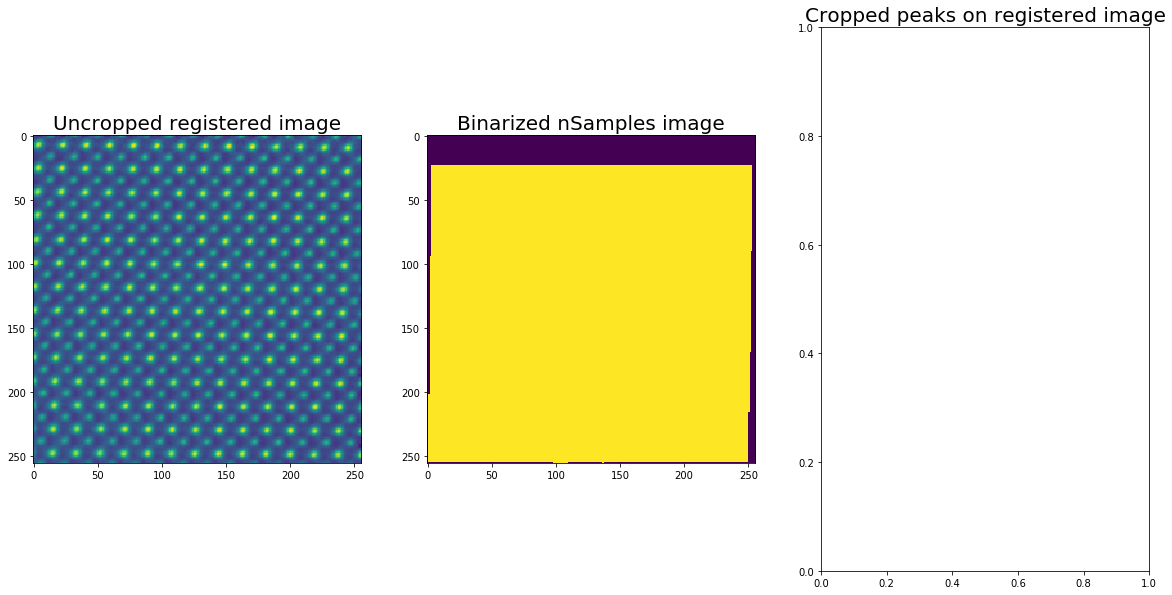

In [43]:
# Test functions on a single registration result
fig = plt.figure(figsize=(20,10))
path = '/srv/home/chenyu/NRR/STO_NRR/DoseTest/Batch1/150/1/HAADF_NRR/stage3/average.q2bz'
fig.add_subplot(1,3,1)
img = LoadImage(path)
plt.imshow(img)
plt.title('Uncropped registered image',fontsize=20)

path = '/srv/home/chenyu/NRR/STO_NRR/DoseTest/Batch1/150/1/HAADF_NRR/stage3/numSamples.q2bz'
nSamples = LoadNumSamples(path)
fig.add_subplot(1,3,2)
plt.imshow(nSamples)
plt.title('Binarized nSamples image',fontsize=20)

fig.add_subplot(1,3,3)
xprec, yprec = PrecisionFromFitting(img,nSamples)
plt.title('Cropped peaks on registered image',fontsize=20)
print(xprec,yprec)

0.1839746857931331 0.16275629220893673


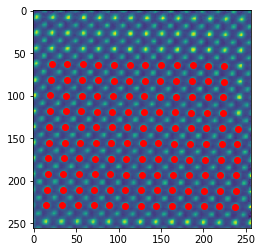

In [44]:
image_max = ndi.maximum_filter(img, size=10, mode='constant')
coordinates = peak_local_max(img, min_distance=15)

peaks_x_fit = []
peaks_y_fit = []

for i in range(coordinates.shape[0]):

    x = int(coordinates[i][1])
    y = int(coordinates[i][0])
    if nSamples[y,x] == 0:
        continue

    if x >=7 and y>=7:
        patch = img[y-6:y+6,x-6:x+6]
        patch = patch - amin(patch)
        bg = 0

        # parameters are in the order of : background, height, cx, cy, wx, wy
        guess = (bg,patch[6,6]-bg,6, 6, 3, 3)
        bounds = ([0,0,0,0,1,1],[np.inf,np.inf,10,10,10,10])
        param = fitGaussianx2(patch, guess, bounds)
        

        peaks_x_fit.append(param[2]+x-6)
        peaks_y_fit.append(param[3]+y-6)
        
plt.imshow(img)
plt.scatter(peaks_x_fit, peaks_y_fit,c='r')
# separations are currently hard coded as 19px, returned values are precision in pixels
xprec = FindXStd(np.asarray(peaks_x_fit),np.asarray(peaks_y_fit),19)
yprec = FindYStd(np.asarray(peaks_x_fit),np.asarray(peaks_y_fit),19)
print(xprec, yprec)

In [2]:
def LoadImage(path):
#     path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/100/HAADF_NRR/stage3/average.q2bz'
    # read header in read text mode
    fid = bz2.open(path, mode='rt',encoding = "ISO-8859-1")
    next(fid)    # magic number P9, skip
#     print(fid.readline())   # description line
    fid.readline()
    size = fid.readline()   # image size in width, height
    width = int(size.split(' ')[0])
    height = int(size.split(' ')[1][:-1])
#     print(width, height)
#     print(fid.readline())   # max?
    # each number is a 8 byte double format

    # read data part in read binary mode
    img = np.zeros((height,width))
    fid = bz2.open(path, mode='rb')
    for _ in range(4):
        next(fid)
    for icol in range(width):
        for irow in range(height):
            read_bytes = fid.read(8)
            img[irow,icol] = struct.unpack('d',read_bytes)[0]

#     plt.imshow(img)
#     plt.colorbar()
    return np.transpose(img)

In [3]:
def LoadNumSamples(path):
    # crop image accroding to numsamples
#     path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/100/HAADF_NRR/stage3/numSamples.q2bz'
    # read header in read text mode
    fid = bz2.open(path, mode='rt',encoding = "ISO-8859-1")
    next(fid)    # magic number P9, skip
    # print(fid.readline())   # description line
    fid.readline()
    size = fid.readline()   # image size in width, height
    width = int(size.split(' ')[0])
    height = int(size.split(' ')[1][:-1])
    # print(width, height)
    # print(fid.readline())   # max?
    # each number is a 8 byte double format

    # read data part in read binary mode
    nSamples = np.zeros((height,width))
    fid = bz2.open(path, mode='rb')
    for _ in range(4):
        next(fid)
    for icol in range(width):
        for irow in range(height):
            read_bytes = fid.read(8)
            nSamples[irow,icol] = struct.unpack('d',read_bytes)[0]

    nSamples = np.heaviside(nSamples-np.amax(nSamples),1)

#     plt.imshow(nSamples)
#     plt.colorbar()
    return np.transpose(nSamples)

In [4]:
# Calculate precision (std) from 2D Gaussian fitting
def PrecisionFromFitting(img,nSamples):
    image_max = ndi.maximum_filter(img, size=10, mode='constant')
    coordinates = peak_local_max(img, min_distance=15)
#     plt.imshow(img)
    # plt.scatter(coordinates[:,0],coordinates[:,1])

    peaks_x_fit = []
    peaks_y_fit = []

    for i in range(coordinates.shape[0]):

        x = int(coordinates[i][1])
        y = int(coordinates[i][0])
        if nSamples[y,x] == 0:
            continue

        if x >=7 and y>=7:
            patch = img[y-6:y+6,x-6:x+6]
            patch = patch - amin(patch)
            bg = 0

            # parameters are in the order of : background, height, cx, cy, wx, wy
            guess = (bg,patch[6,6]-bg,6, 6, 3, 3)
            bounds = ([0,0,0,0,1,1],[np.inf,np.inf,10,10,10,10])
            param = fitGaussianx2(patch, guess, bounds)
            
            peaks_x_fit.append(param[2]+x-6)
            peaks_y_fit.append(param[3]+y-6)

#     plt.scatter(peaks_x_fit, peaks_y_fit,c='r')
    # separations are currently hard coded as 19px, returned values are precision in pixels
    xprec = FindXStd(np.asarray(peaks_x_fit),np.asarray(peaks_y_fit),19)
    yprec = FindYStd(np.asarray(peaks_x_fit),np.asarray(peaks_y_fit),19)
    return xprec, yprec

In [5]:
# Old precision calculation function using csv file, not in use here
def FindPrecision(csvFileName,txtFileName,threshold,separation):
    start = 0
    with open(csvFileName) as csvfile:
        file=csv.reader(open(csvFileName,'r'))
        peaks_x = []
        peaks_y = []
        for row in file:
            if start == 0:
                start = 1
                continue
            peaks_x.append(float(row[0]))
            peaks_y.append(float(row[1]))

    with open(txtFileName) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content];

    peaks_int = []
    for i in range(len(peaks_x)):
        peaks_int.append(float(content[i*3+2]))
        
    array_x = np.asarray(peaks_x)
    array_y = np.asarray(peaks_y)
    array_int = np.asarray(peaks_int)
    index = np.where((array_x>10) & (array_x<140) & (array_y > 10) & (array_y < 140))
    array_x = array_x[index]
    array_y = array_y[index]
    array_int = array_int[index]
        
    lattice1 = np.where(array_int>threshold)
    array_x1 = array_x[lattice1]
    array_y1 = array_y[lattice1]
    array_int1 = array_int[lattice1]

    return FindYStd(array_x1,array_y1,separation),FindXStd(array_x1,array_y1,separation)

In [6]:
def FindYStd(array_x1_copy,array_y1_copy,separation):
    y_sep = []
    while array_x1_copy.size != 0:
        x_cor = array_x1_copy[0]
        index = np.where((array_x1_copy<x_cor+3) & (array_x1_copy>x_cor-3))
        array_y_sub = array_y1_copy[index]
        array_y_sub = np.sort(array_y_sub)
        for i in range(array_y_sub.shape[0]-1):
            spacing = array_y_sub[i+1] - array_y_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                y_sep.append(spacing)
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    y_std = np.std(np.asarray(y_sep))
    return y_std

In [7]:
def FindXStd(array_x1_copy,array_y1_copy,separation):
    x_sep = []
    while array_x1_copy.size != 0:
        y_cor = array_y1_copy[0]
        index = np.where((array_y1_copy<y_cor+3) & (array_y1_copy>y_cor-3))
        array_x_sub = array_x1_copy[index]
        array_x_sub = np.sort(array_x_sub)
        for i in range(array_x_sub.shape[0]-1):
            spacing = array_x_sub[i+1] - array_x_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                x_sep.append(array_x_sub[i+1] - array_x_sub[i])
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    x_std = np.std(np.asarray(x_sep))
    return x_std

In [8]:
def fitGaussianx2(data, guess, bounds):
    x = np.linspace(0, data.shape[1]-1, data.shape[1])
    y = np.linspace(0, data.shape[0]-1, data.shape[0])
    x, y = np.meshgrid(x, y)
    xdata_tuple = (x,y)
    popt, pcov = optimize.curve_fit(gaussianx2, xdata_tuple, data.ravel(), p0=guess,bounds=bounds,method='trf',verbose=0,maxfev=100000)
    return popt

In [9]:
def gaussianx2(xdata_tuple,bg,height, center_x, center_y, width_x, width_y):

    (x, y) = xdata_tuple
    width_x = float(width_x)
    width_y = float(width_y)
    g = height*exp(
                 -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)+bg
    return g.ravel()